<a href="https://colab.research.google.com/github/BPatsai/szvd_p/blob/main/%D0%9A%D0%BE%D0%BF%D1%96%D1%8F_%D0%B7%D0%B0%D0%BF%D0%B8%D1%81%D0%BD%D0%B8%D0%BA%D0%B0_%22%D0%9B%D0%A0_9_Seaborn_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторна робота 9
Знайомство із бібліотеками Matplotlib, Pandas, Plotly, Seaborn

Для створення візуалізацій зі складними параметрами параметрів відображення даних зазвичай використовується бібліотека Seaborn. Seaborn — графічна бібліотека з великими функціональними можливостями, що дозволяє створювати різні типи графіки та використовувати розширені налаштування при оформленні. Багато функцій Seaborn інтегровані з бібліотекою Matplotlib, що створює додаткові можливості для візуалізації даних. На офіційному сайті https://seaborn.pydata.org/tutorial.html можна знайти розділи з покроковими інструкціями та галерею https://seaborn.pydata.org/examples/index.html зі складними візуалізаціями та вихідними кодами, а також опис використання кольорових палітр http://seaborn.pydata.org/tutorial/color_palettes.html при візуалізації даних.

In [ ]:
pip install seaborn

Імпортуємо бібліотеки Seaborn, Matplotlib і Pandas для роботи з датафреймами та коректного відображення інформації в jupyter notebook:

In [ ]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

Відключимо повідомлення про помилки

In [ ]:
import warnings; warnings.simplefilter('ignore')

Встановіть стандартні параметри відображення графіків за допомогою команди

In [ ]:
sns.set()

Для демонстрації інструментів візуалізації Seaborn завантажуємо набір даних tips.csv, з якою будемо працювати (набір даних, що містить інформацію про відвідування одного з ресторанів швидкого харчування в США на початку 90-х років):
Даний файл повинен бути завантажений в кореневу папку Jupiter notebook

Спробуйте відкрити даний файл у Google таблицях

In [ ]:
df=pd.read_csv('tips.csv')

Виведемо 5 перших записів таблиці

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: >

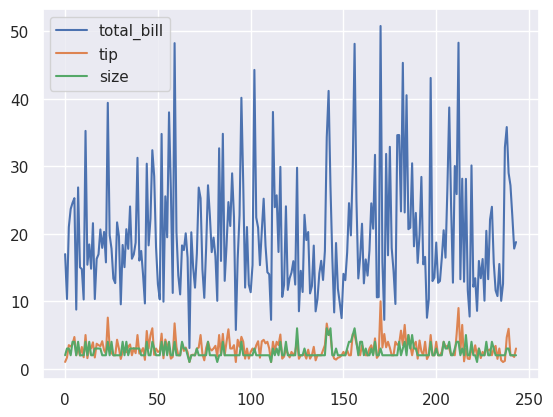

In [ ]:
df.plot()

Для визуализации распределения количественных признаков используются следующие типы графиков:

displot https://seaborn.pydata.org/generated/seaborn.displot.html#seaborn.displot
jointplot http://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot
rugplot http://seaborn.pydata.org/generated/seaborn.rugplot.html?highlight=rugplot#seaborn.rugplot
kdeplot http://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot

Подивимось на графіку displot розміру чека:

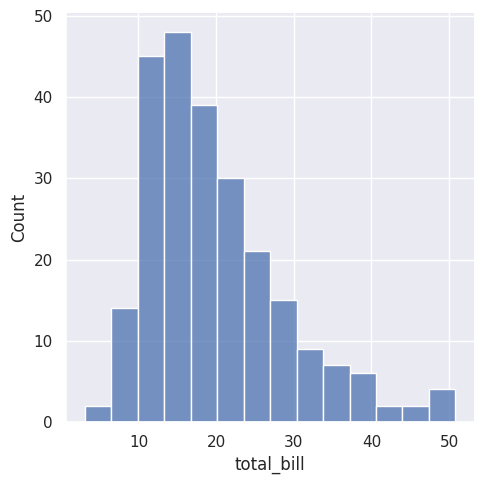

In [ ]:
sns.displot(df['total_bill'])

Seaborn дозволяє розмістити на одному графіку гістограмми розподіл двох ознак і показати зв'язок між ними. Тип графіки, який використовується для цього, називається jointplot:

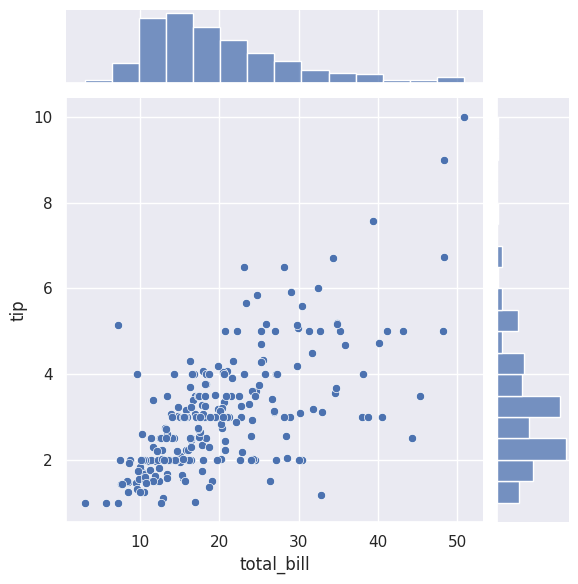

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=df)

Характер представлення інформації в центральній частині графіка регулюється за допомогою параметра kind:

“scatter”
“reg”
“resid”
“kde”
“hex”

Наприклад, kind = 'reg' виводить на екран не тільки точки, що представляють дані про окремі пари «розмір чека» – «чаєві», але і лінію регресії, що виражає загальний характер зв'язку між двома величинами.

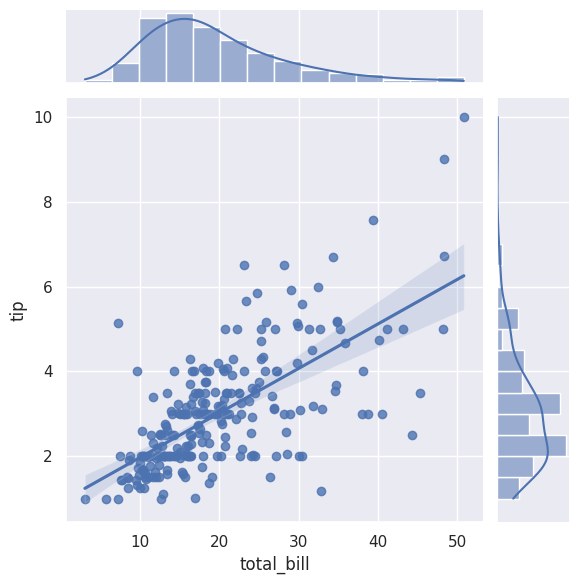

In [ ]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

Графіки Щільності розподілу відображаються за допомогою kdeplot http://seaborn.pydata.org/generated/seaborn.kdeplot.html?highlight=kdeplot#seaborn.kdeplot або rugplot http://seaborn.pydata.org/generated/seaborn.rugplot.html?highlight=rugplot#seaborn.rugplot (чим щільніше розташовані лінії, тим вище щільність. Краще використовувати його спільно з іншими видами графіків):


In [ ]:
sns.kdeplot(df['total_bill'])

sns.введіть тип графіку 2(df['total_bill'])

Інший швидкий і наглядний спосіб показати гістограмми розподілу кількості ознак і особливості зв'язків між ними — побудувати графік типу pairplot - показує співвідношення між усіма парами змінних:

In [ ]:
sns.pairplot(df)

За попарний розподіл кількості позначок з групуванням за якою-небудь ознакою відповідає параметр «hue», наприклад, групування за ознакою «Sex» (встановленій палітрі palette='Set1'):

In [ ]:
sns.pairplot(df, Введіть_параметр='sex', palette='Set1')

Метод pairplot — це спрощена версія іншої функції, яка називається PairGrid (по діагоналі відобразимо гістограмму розподілу ознак, поверх діагоналі — щільність розподілу ознак, знизу діагоналі — графіки двомірної щільності розподілу позначок):

In [ ]:
fig=sns.PairGrid(df)

fig.map_diag(plt.hist)

fig.map_upper(plt.scatter)

fig.map_lower(sns.kdeplot)

FacetGrid http://seaborn.pydata.org/generated/seaborn.FacetGrid.html?highlight=facetgrid#seaborn.FacetGridдозволяє візуалізувати спільне розподіл окремих позначок кількох змінних, наприклад час відвідування ресторану та курящих/некурящих:


In [ ]:
fig=sns.FacetGrid(df, col="time", row="smoker")

fig=fig.map(plt.hist, "total_bill")

# Работа с категориальными признаками
Для відображення інформації про якісні ознаки на діаграмах за методами бібліотек Pandas і Matplotlib необхідно попередньо обробити датафрейм, групуючи потрібні дані. У Seaborn таких проблем немає: при побудові графіків можна звертатися до столбців з категоріальними визнаннями напряму.

У Seaborn вбудовані функції для візуалізації категоріальних даних у наступних форматах:

countplot
barplot
boxplot
violinplot
stripplot
swarmplot
catplot



Побудова гістограмми розподілу категоріальних даних (кількість відвідувань по днях тижня) методом countplot http://seaborn.pydata.org/generated/seaborn.countplot.html?highlight=countplot#seaborn.countplot (майже як barplot, тільки функція явно задана, і вона враховує кількість значень у кожній категорії):

In [ ]:
sns.Введіть_метод(x='day', data=df)

Гістограму можна зробити горизонтальною, змінивши x на y

In [ ]:
sns.countplot(y='day', data=df)

Категоріальні значення при побудові графіків можна використовувати в якості одного з параметрів методу barplot (http://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot). Він дозволяє розділити датафрейм на групи в залежності від значення категоріальної змінної. За замовчуванням для кожної групи вираховується середнє значення заданої кількості змінної. Замість середнього значення можна обчислити й будь-яку іншу статистичну характеристику, назву якої задають у параметрі estimator.

In [ ]:
sns.barplot(x='sex', y='total_bill', data=df)


boxplot і violinplot - використовуються для вивчення форми розподілу.

boxplot (інша назва - ящик з вусами або діаграма розмаху. Він був розроблений Джоном Тьюкі в 1970-х роках.) - графік, компонентами якого є:

Відрізок (Range), що відображає діапазон значень набору даних
Прямоугольник (Box) — відображає межі основного обсягу даних. Левою межею вважається значення 25%-ого квантиля, або Q1, перший квартал. Правою межею є 75%-ий квантиль, або Q3, третій квартал)
Вуса (whiskers) — відмітки на осі, що представляють ліве і праве «крайнє» значення даних. Фактично ці значення не завжди є мінімальним або максимальним набором. Вони представляють значення, що відрізняються від 1.5*IQR вліво або вправо від лівої (Q1) або правої (Q3) границі відповідно. Тут IQR - Interquartile Range (межквантильный диапазон) — ширина прямокутника від Q1 до Q3
Викиди (Outliers) — значення, що знаходяться за лівим і правим «крайніми» значеннями на осі.

![image.png](attachment:image.png)

Метод boxplot дозволяє відобразити розподіл заданої кількісної ознаки за категоріями, які визначають значення заданогї якісної ознаки.

На діаграмі нижче вказано, як змінилася сума чека в залежності від дня тижня:

In [ ]:
sns.Введіть_метод(x="day", y="total_bill", data=df, palette='Set1')

Використання параметра hue - спосіб збільшення інформативності методів Seaborn. Цей параметр дозволяє додатково розділити відображувані дані в залежності від значень нової категоріальної ознаки.

Зверніть увагу, як змінюється boxplot при додаванні параметра hue:

In [ ]:
sns.boxplot(x='day', y='tip', data=df, Введіть_параметр='smoker', palette='Set1')

# # Метод violinplot

http://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot

Виконує ту ж функцію, що і boxplot. По суті це два пов'язані на 90 і -90 градуси графіка щільності розподілу, що з'єднуються з іншим. (скрипка)


Як змінилася сума чека в залежності від дня тижня:

In [ ]:
sns.введіть_метод(x="day", y="total_bill", data=df, palette='Set2')

Як змінилося розподіл суми чека в різні дні тижня в зонах для курящих і некурящих гостей ресторану:

In [ ]:
'модифікуйте попередній код використавши параметр hue'

## stripplot

http://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot

малює діаграму розсіювання, що складається з однієї категоріальної змінної. Його можна використовувати як самостійну фігуру, але краще поєднувати з іншими графіками.

In [ ]:
sns.Введіть_метод(x="day", y="total_bill", data=df, palette="Set2")

## swarmplot

http://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot

представляє собою такe само діаграму розсіювання, з тією лише різницею, що точки не накладаються одна на одну, додамо ще параметр hue.

In [ ]:
sns.введіть_метод(x="day", y="total_bill", hue='sex', data=df)